# World Happiness Report


The UN releases a yearly World Happiness Report - a ranking of which countries in the world could be considered as "happy". This report contains about 155 countries around the world to construct an understanding of which countries may be the happiest. This ranking could be an indication of a country's progress, the operative word is 'could'.

The UN looked at seven different variables and took a survey of the population in order to construct an overall "happiness score". The Happiness Score is derived simply by interviewing a random population sample from each country in a poll that “asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.”


Using these seven variables, we can then attempt to construct a linear regression model which may help us predict the happiness score in these countries. We can then compare the predicted score to the actual score to observe how accurate how model is. Moving on, while we are using these variables to just build an understanding of the ranking - we can still see which variable(s) are highly correlated with happiness score.



In this notebook, I will carry out an exploratory data analysis of the World Happiness Reports for years 2015-2019. I will also use the linear regression model to predict the happiness score for a selected set of data.

What factors influence the happiness of citizens the most?

The steps include:

1.Data Preprocessing and Understanding

2.Data Visualization and Analysis

3.Modeling and Prediction

4.Model Evaluation

In [2]:
# importing python libraries      

import pandas as pd                  # for data manipulation

import numpy as np                   # for mathematical calculations

import seaborn as sns                # for data visualization

import matplotlib.pyplot as plt      # for plotting graphs
plt.style.use('seaborn')             # the seaborn stylesheet will make our plots look neat and pretty.

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

## Data Preprocessing and Understanding

In [3]:
# Loading the data

whr_2015 = pd.read_csv('2015.csv')
whr_2016 = pd.read_csv('2016.csv')
whr_2017 = pd.read_csv('2017.csv')
whr_2018 = pd.read_csv('2018.csv')
whr_2019 = pd.read_csv('2019.csv')

In [4]:
#previewing 2015 report
# .head() returns the first 5 rows in the dataframe

whr_2015.head()

# Alternatively, you can use 'train.sample(5)'' to get the same output

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
#previewing 2016 report

whr_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
#previewing 2017 report

whr_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [9]:
#previewing 2018 report

whr_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [10]:
#previewing 2019 report

whr_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
years = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

for year in years:
    print(year.shape)                                             # returns the no. of rows and columns
    print(year.columns)                                           # returns the no. names of columns

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
(156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support',

In [12]:
# dropping irrelevant columns
# (inplace=True) argument means that changes made to the dataframe remains permanent.

whr_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)

whr_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)

whr_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)

#nothing to drop for 2018 and 2019 dataframe

In [13]:
# Reordering the columns to acheive uniformity

whr_2015 = whr_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]
whr_2016 = whr_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]
whr_2017 = whr_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.']]

# whr_2018 and whr_2019 already have the correct order so no need to reorder

In [14]:
#renaming the columns to ensure all columns have same name across the years

# New column names = new_cols
new_cols = ['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']

years = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]
for year in years:
    year.columns = new_cols
    #print(year.columns)

### Features Description

Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.
    
Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)
    
Country: The country in question
        
Economy: GDP per capita of the country - individuals rank they quality of life based on the amount they earn
    
Family: quality of family life, nuclear and joint family
    
Health: ranking healthcare availability and average life expectancy in the country
    
Freedom: how much an individual is able to conduct them self based on their free will
    
Trust: in the government to not be corrupt
    
Generosity: how much their country is involved in peacekeeping and global aid

In [15]:
#merging all 5 dataframes into one

whr_all = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019]

happiness = pd.concat(whr_all)

happiness.head()

,Happiness Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [16]:
# This is used to view basic statistical details like percentile, mean, std etc.

happiness.describe(include='all')        

,Happiness Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
count,782.000000,782,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000
unique,NaN,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.698210,NaN,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436
std,45.182384,NaN,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816
min,1.000000,NaN,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,NaN,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000
50%,79.000000,NaN,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000
75%,118.000000,NaN,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030


In [17]:
# Checking to see if any feature has empty/missing values

happiness.isnull().sum()

Happiness Rank                  0
Country                         0
Happiness Score                 0
GDP per capita                  0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
Generosity                      0
Perceptions of Corruption       1
dtype: int64

The 'Perceptions of Corruption' column has one empty row, this will be replaced by median imputation

In [18]:
# filling the empty row with the median of the colunm

median = happiness['Perceptions of Corruption'].median()
#print(median)

happiness['Perceptions of Corruption'].fillna(median, inplace = True)

In [19]:
# checkinf for duplicate values

happiness.duplicated().sum()

0

In [20]:
# The info() function is used to print a concise summary of a DataFrame

happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness Rank                782 non-null    int64  
 1   Country                       782 non-null    object 
 2   Happiness Score               782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social Support                782 non-null    float64
 5   Healthy Life Expectancy       782 non-null    float64
 6   Freedom to Make Life Choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of Corruption     782 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 61.1+ KB


We see that after cleaning we have 782 rows of clean data with no null values. There are 9 columns and three dtypes(int, float and object)

The data is now clean and void of unnecessary features, we can now proceed to visualizing the data to see the relationship between features

In [36]:
happiness.to_csv('cleaned_happiness.csv', index =False)

## Data Visualization and Analysis

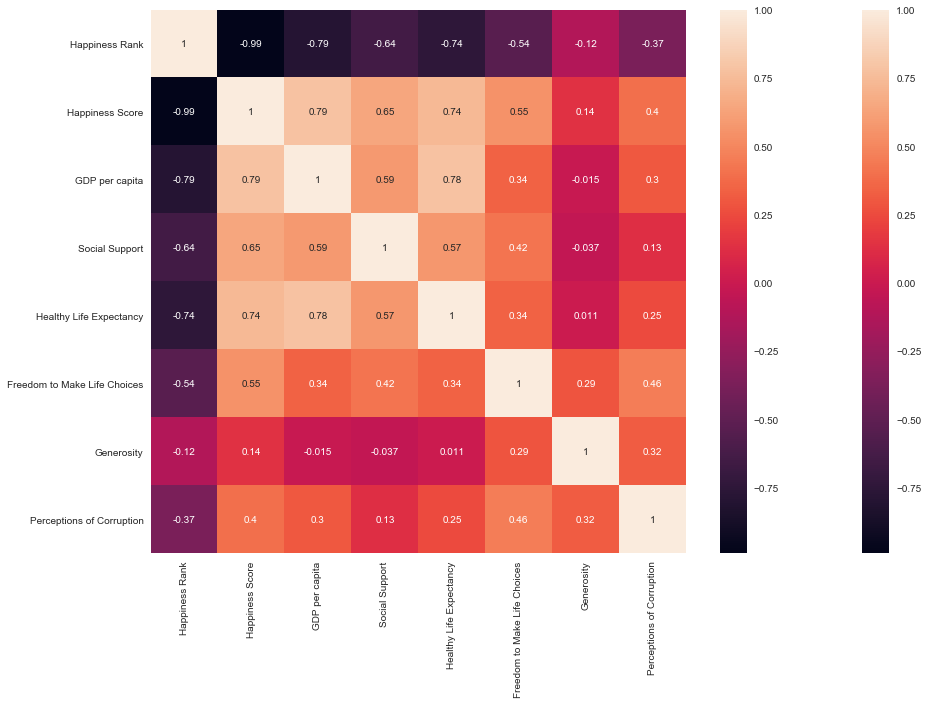

In [21]:
# First let's see the correlation between the features
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting this target variable.
# Heatmaps are typically used to visualize correlation matrices.



plt.figure(figsize=(15, 10))                 # This specifies the size, the bigger the map, the easier we can understand the map

sns.heatmap(happiness.corr())                # This is sufficient but adding the 'annot' argument makes interpretaton easier

sns.heatmap(happiness.corr(), annot = True)  # 'annot' helps display the correlation coefficient


plt.show()

The darker the box, the stronger/higher the correlation.

Happiness Score correlates strongly with GDP per capita and Healthy Life Expectancy. It has low correlates with Generosity and Perceptions of Corruption.

### Univariate Plots
This is the plots of each individual variable. They help us understand each attribute better.

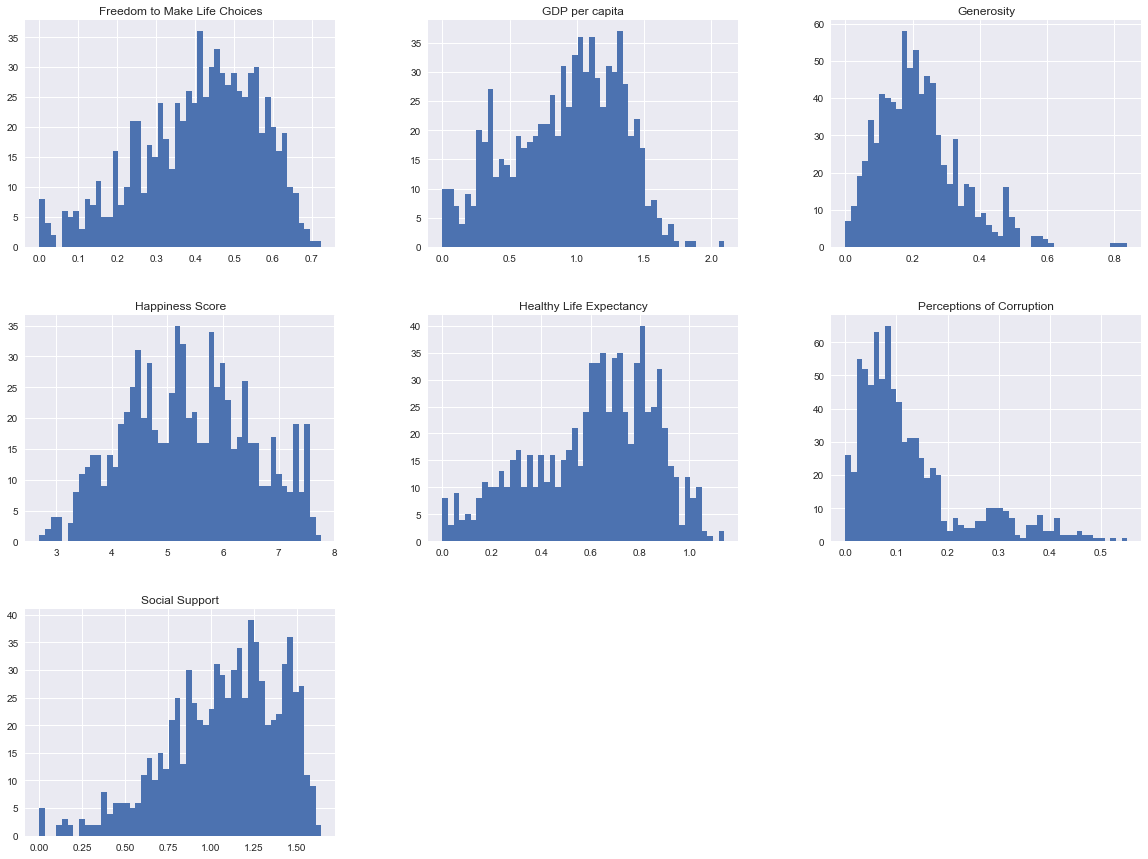

In [22]:
# Let's view the distribution of the features with histogram

happiness[['Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']].hist(figsize=(20,15), bins=50);

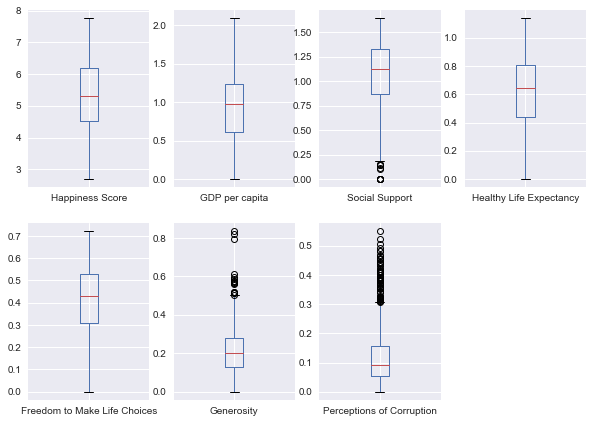

In [23]:
# We can check for outliers using boxplots

happiness[['Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,15), grid=True);

## Modeling and Prediction

Now that the data is clean and we have an understandng of the variables, we can now construct a model. 

First, we drop any categorical variables, and the happiness rank as that is not something we are exploring in this report. (That being said, we can create dummy variables to look at relationships for countries).

In [24]:
# We'll drop the Country variable because it's categorical, we'll also drop the happiness rank beacuse it's irrelevant to this model
# this leaves only numerical features in the data frame


new_happiness = happiness.drop(['Country', 'Happiness Rank'], axis=1)
new_happiness.head()
#new_happiness.info()

,Happiness Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [35]:
# first, let's split our data into training(80%) and testing(20%)

from sklearn.model_selection import train_test_split


X = new_happiness[['GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']]
y = new_happiness['Happiness Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
# Next we need to scale the data before feeding it to the model
# To standardize our data, we need to import the StandardScaler from the sklearn library 

#from sklearn.preprocessing import StandardScaler 


#scale = StandardScaler()

#new_happiness = scale.fit_transform(new_happiness)

In [ ]:
# Training the algorithm

from sklearn.linear_model import LinearRegression

lm = LinearRegression()                         # instantiating the model

lm.fit(X_train, y_train)                        # fitting the model with the training dataset


#print(lm.coef_)

In [32]:
# making predictions on the test data

y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
67,5.525,5.672292
17,6.886,6.604364
36,6.344,6.372819
14,7.119,6.590384
145,3.781,4.242931
...,...,...
64,5.709,5.400294
152,3.303,4.658376
52,5.878,5.572158
21,6.627,6.742066


In [33]:
coefficient = lm.coef_

#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight


coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,GDP per capita,1.132765
1,Social Support,0.570223
2,Healthy Life Expectancy,1.052623
3,Freedom to Make Life Choices,1.417295
4,Generosity,0.403957
5,Perceptions of Corruption,1.139164


In [ ]:
From the output above, we see that, GDP per capita is the most important factor contributing to happiness of citizens. Health, freedom and social support are also important but carry less weight in this model.

## Model Evaluation

Evaluation helps us see how well our model performed on this particular dataset.

For regression algorithms, three evaluation metrics are commonly used:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors
Mean Squared Error (MSE) is the mean of the squared errors
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


print('Mean Absolute Error:', MAE(y_test, y_pred))
print('Mean Squared Error:', MSE(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Mean Absolute Error: 0.4325407787453411
Mean Squared Error: 0.31421636511288886
Root Mean Squared Error: 0.5605500558495101


For MAE, the lower the score, the better our model is at making predictions. As we can see, the score for our model when all are variables are involved is very low, 8.18 x 10e-8.